In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


image 1/1 /content/drive/MyDrive/Colab Notebooks/images/13.jpeg: 320x416 1 cheetah, 42.4ms
Speed: 1.3ms preprocess, 42.4ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 416)


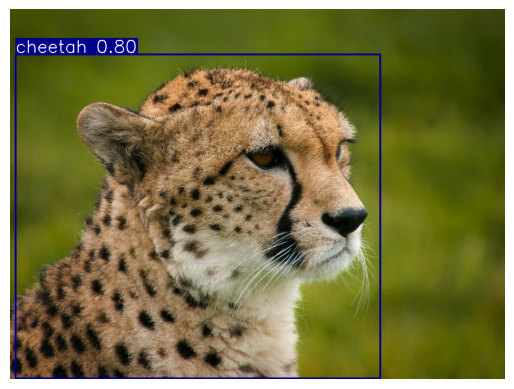

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

# Load the model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/best.pt')

# Run detection on the image
results = model('/content/drive/MyDrive/Colab Notebooks/images/13.jpeg')[0]

# Copy the original image
img = results.orig_img.copy()

# Draw bounding boxes manually in dark blue with larger white font
for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cls = int(box.cls[0])
    label = f"{model.names[cls]} {conf:.2f}"

    # Dark blue color (BGR)
    dark_blue = (139, 0, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), dark_blue, 3)

    # Text settings
    font_scale = 1.5
    thickness = 2
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)

    # Draw background for label
    cv2.rectangle(img, (x1, y1 - h - 10), (x1 + w, y1), dark_blue, -1)

    # Draw label in white
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

# Make sure directory exists
save_dir = 'runs/detect/predict'
os.makedirs(save_dir, exist_ok=True)

# Save path
save_path = os.path.join(save_dir, 'detected_image.jpeg')
cv2.imwrite(save_path, img)

# Show image inline
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Download the image
files.download(save_path)


In [ ]:
# Step 1: Install YOLOv8
# !pip install ultralytics

# Step 2: Import necessary libraries
from ultralytics import YOLO
import os
from google.colab import files

# Step 3: Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/best 11s.pt")

# Step 4: Set paths
input_video = "/content/drive/MyDrive/Colab Notebooks/videos/video_8.mp4"
output_dir = "/content/detected"
output_subfolder = "predict_cheetah"  # Avoid auto-increment folders

# Step 5: Run detection
results = model.predict(
    source=input_video,
    save=True,
    conf=0.5,
    project=output_dir,
    name=output_subfolder,
    exist_ok=True
)

# Step 6: Detect correct file extension (e.g., .avi, .mp4)
output_folder_path = os.path.join(output_dir, output_subfolder)
file_list = os.listdir(output_folder_path)

# Find video file
video_file = next((f for f in file_list if f.endswith(('.mp4', '.avi', '.mov'))), None)

# Step 7: Rename and download
if video_file:
    original_path = os.path.join(output_folder_path, video_file)
    new_filename = "cheetah_vid" + os.path.splitext(video_file)[1]  # Preserve original extension
    renamed_path = os.path.join(output_folder_path, new_filename)

    os.rename(original_path, renamed_path)
    print(f"✅ Processed video renamed and saved at: {renamed_path}")
    files.download(renamed_path)
else:
    print("⚠️ No video file found in output folder.")
    print("Contents of folder:")
    print(file_list)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/354) /content/drive/MyDrive/Colab Notebooks/videos/video_8.mp4: 384x640 2 cheetahs, 11.3ms
video 1/1 (frame 2/354) /content/drive/MyDrive/Colab Notebooks/videos/video_8.mp4: 384x640 2 cheetahs, 10.6ms
video 1/1 (frame 3/354) /content/drive/MyDrive/Colab Notebooks/videos/video_8.mp4: 384x640 2 cheetahs, 10.6ms
video 1/1 (frame 4/354) /content/drive/MyDrive/Colab Notebooks/videos/video_8.mp4: 384x640 2 cheetahs, 10.6ms
video 1/1 (frame

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 384x640 1 cheetah, 19.0ms
Speed: 3.3ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.6ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (

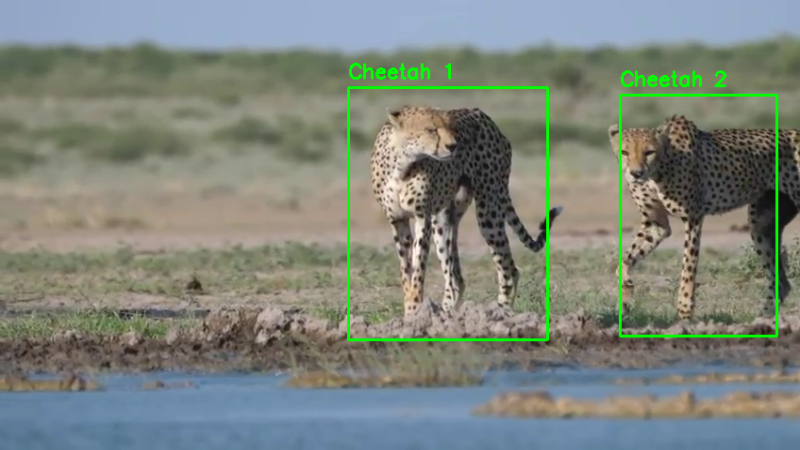


0: 384x640 2 cheetahs, 13.3ms
Speed: 7.6ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 14.8ms
Speed: 3.1ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 13.3ms
Speed: 3.1ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 11.7ms
Speed: 2.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 13.2ms
Speed: 2.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 11.8ms
Speed: 3.1ms preprocess, 11.8ms inference, 1.6ms postprocess per image at

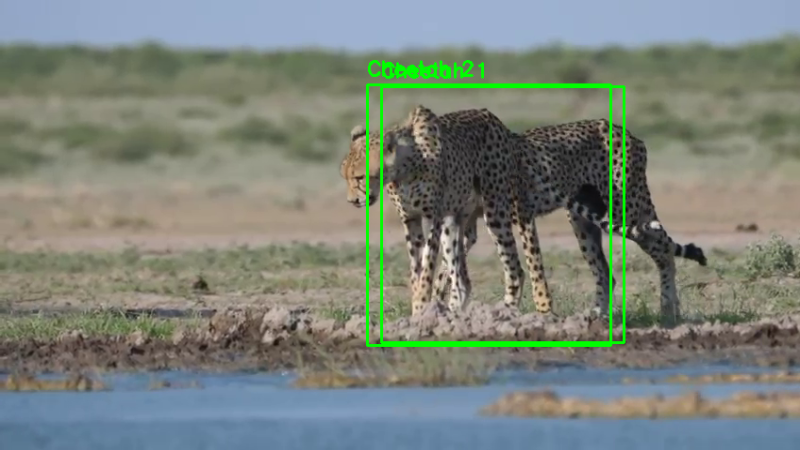


0: 384x640 1 cheetah, 18.3ms
Speed: 3.0ms preprocess, 18.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 16.6ms
Speed: 2.9ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.1ms
Speed: 2.9ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.3ms
Speed: 2.9ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.1ms
Speed: 2.9ms preprocess, 12.1ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 15.6ms
Speed: 3.0ms preprocess, 15.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.0ms
Speed: 2.8ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (

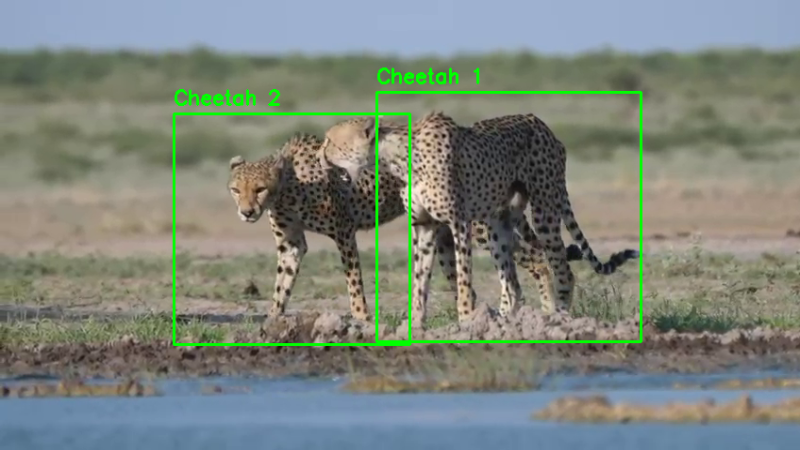


0: 384x640 1 cheetah, 14.4ms
Speed: 3.1ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.3ms
Speed: 2.9ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 13.2ms
Speed: 2.8ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape

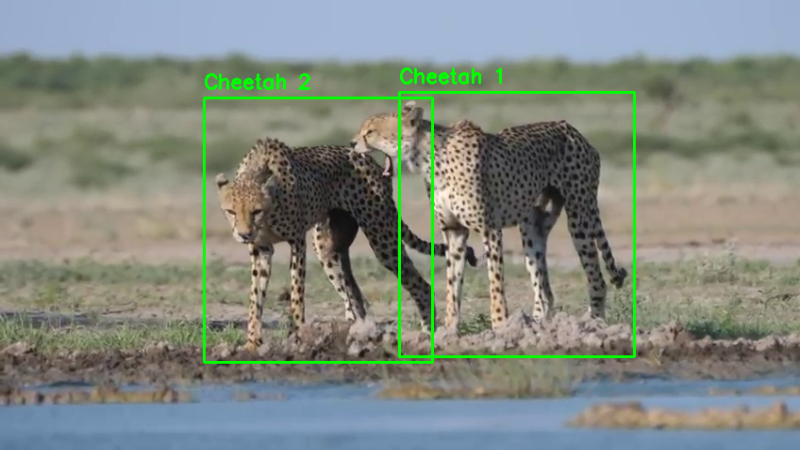


0: 384x640 1 cheetah, 12.9ms
Speed: 3.5ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.1ms
Speed: 3.1ms preprocess, 14.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 12.3ms
Speed: 3.0ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 19.7ms
Speed: 2.8ms preprocess, 19.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 46.1ms
Speed: 2.9ms preprocess, 46.1ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 1.8ms postprocess per imag

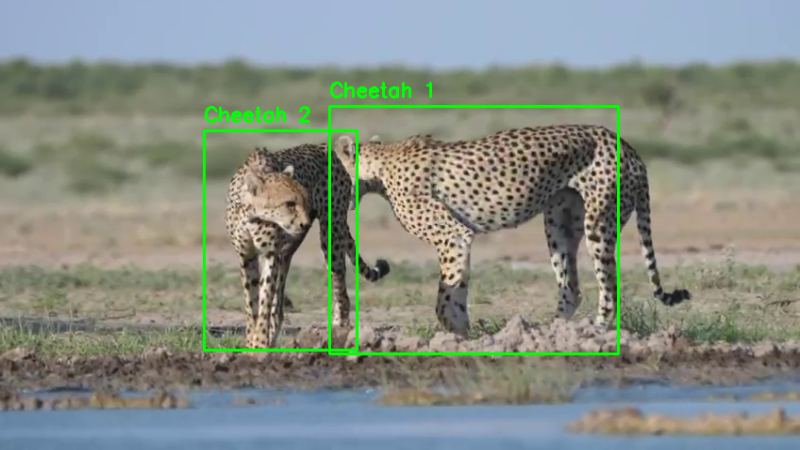


0: 384x640 1 cheetah, 16.0ms
Speed: 3.2ms preprocess, 16.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.2ms
Speed: 4.2ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.5ms
Speed: 2.9ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.8ms
Speed: 2.9ms preprocess, 13.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.4ms
Speed: 4.2ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (

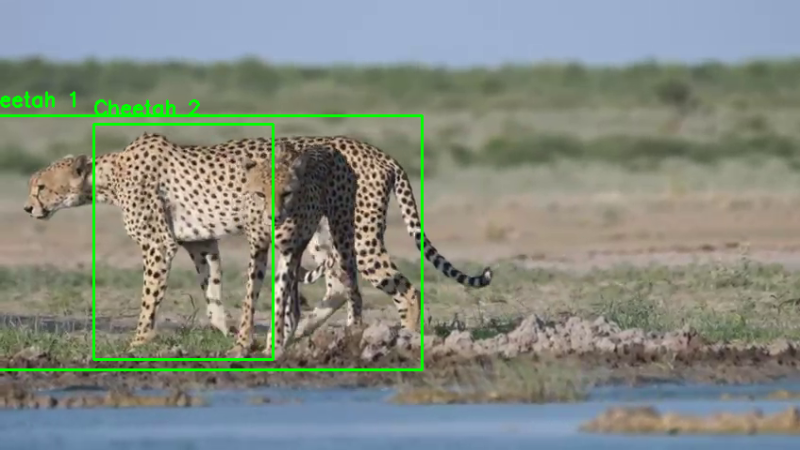


0: 384x640 1 cheetah, 22.5ms
Speed: 3.0ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 18.4ms
Speed: 4.5ms preprocess, 18.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 15.0ms
Speed: 4.0ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 18.7ms
Speed: 2.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.4ms
Speed: 3.9ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 17.5ms
Speed: 3.0ms preprocess, 17.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.4ms
Speed: 3.4ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.1ms
Speed: 3.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (

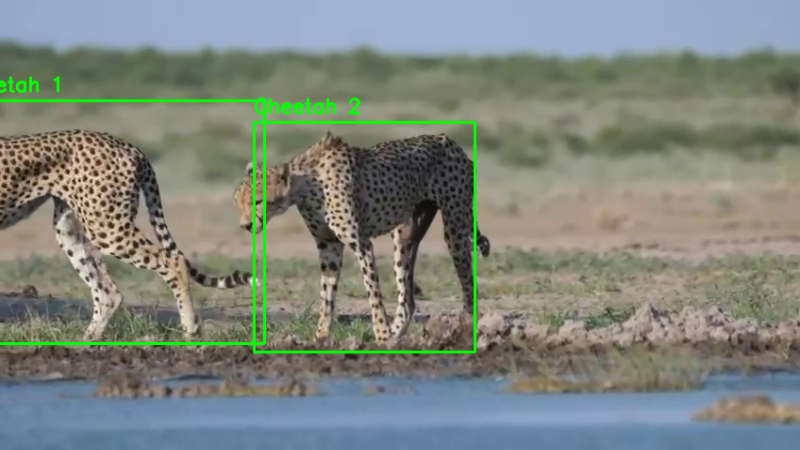


0: 384x640 2 cheetahs, 19.1ms
Speed: 2.9ms preprocess, 19.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 22.2ms
Speed: 2.8ms preprocess, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 13.2ms
Speed: 2.8ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 16.0ms
Speed: 2.9ms preprocess, 16.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 22.9ms
Speed: 2.9ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cheetahs, 23.3ms
Speed: 3.0ms preprocess, 23.3ms inference, 1.8ms postprocess per image at

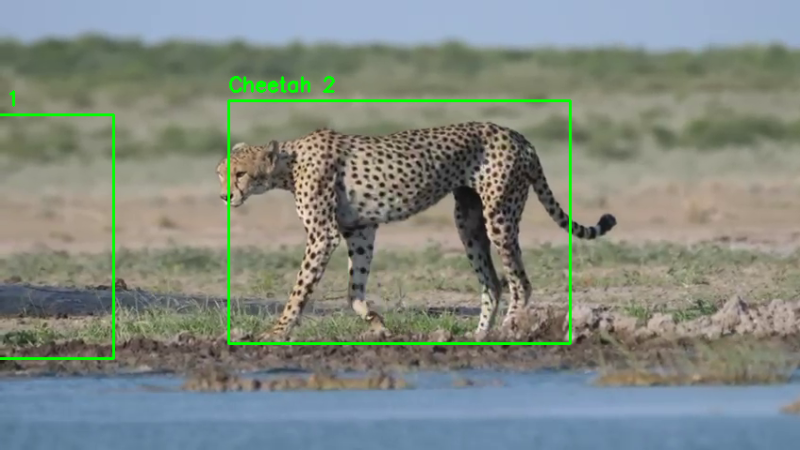


0: 384x640 1 cheetah, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 20.9ms
Speed: 2.8ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 18.2ms
Speed: 2.8ms preprocess, 18.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 17.2ms
Speed: 2.8ms preprocess, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 14.1ms
Speed: 3.2ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 21.3ms
Speed: 2.6ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 17.1ms
Speed: 3.6ms preprocess, 17.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 17.4ms
Speed: 3.0ms preprocess, 17.4ms inference, 3.1ms postprocess per image at shape (

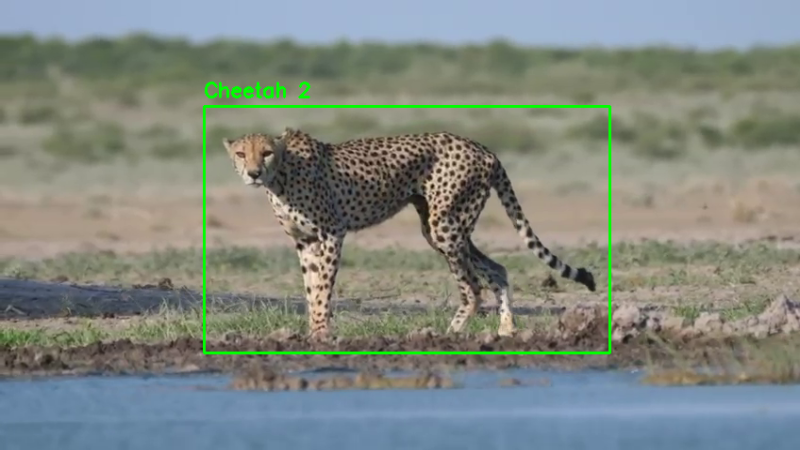


0: 384x640 1 cheetah, 14.0ms
Speed: 3.3ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.8ms
Speed: 3.7ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 14.2ms
Speed: 3.1ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 14.4ms
Speed: 3.1ms preprocess, 14.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.5ms
Speed: 4.1ms preprocess, 13.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 16.8ms
Speed: 3.7ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (

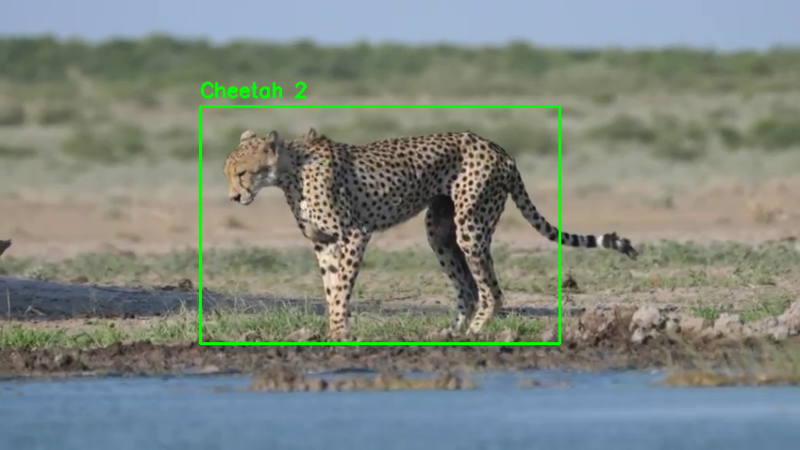


0: 384x640 1 cheetah, 17.2ms
Speed: 3.1ms preprocess, 17.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cheetah, 13.6ms
Speed: 4.1ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Tracking completed! Output saved to: tracked_output.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# DeepSORT

# Step 1: Install Requirements (if needed)
# !pip install ultralytics
# !pip install deep-sort-realtime==1.3.2
# !pip install ultralytics opencv-python numpy deep-sort-realtime==1.3.2

# Step 2: Imports
import torch
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Step 3: Initialize YOLOv8x and DeepSORT
def setup_models(weights_path):
    model = YOLO(weights_path)  # Load YOLOv8x model
    tracker = DeepSort(
        max_age=50,
        n_init=3,
        max_cosine_distance=0.4,
        nn_budget=100,
        embedder="mobilenet",
        embedder_gpu=True
    )
    return model, tracker

# Step 4: Tracking Function
def detect_and_track(frame, model, tracker):
    results = model.predict(frame, imgsz=640, conf=0.6, iou=0.6, device=0 if torch.cuda.is_available() else 'cpu')
    detections = []

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            conf = float(box.conf)
            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, None))

    if detections:
        tracks = tracker.update_tracks(detections, frame=frame)
        for track in tracks:
            if not track.is_confirmed():
                continue
            track_id = track.track_id
            bbox = track.to_ltrb()
            cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])),
                         (int(bbox[2]), int(bbox[3])), (0,255,0), 2)
            cv2.putText(frame, f"Cheetah {track_id}", (int(bbox[0]), int(bbox[1]-10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    return frame

# Step 5: Main Function with Video Saving
def main(model_path, video_path):
    # Check if files exist
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"Video file not found at {video_path}")

    model, tracker = setup_models(model_path)

    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    output_path = 'tracked_output.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        if frame_count % 2 == 0:
            result = detect_and_track(frame, model, tracker)
            out.write(result)

            if frame_count % 50 == 0:
                print(f"Processed frame {frame_count}")
                cv2_imshow(cv2.resize(result, (800, 450)))

    cap.release()
    out.release()

    print("Tracking completed! Output saved to:", output_path)
    return output_path

# Entry Point
if __name__ == "__main__":
    # Specify your paths here
    MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/last (1).pt"  # Change this to your model path
    VIDEO_PATH = "/content/drive/MyDrive/Colab Notebooks/videos/video 5.mp4"  # Change this to your video path

    output_video = main(MODEL_PATH, VIDEO_PATH)

    # To download the output video
    from google.colab import files
    files.download(output_video)